# Einführung in die Statistik mit Python - Tag 2

## Statistische Berechnungen mit Python

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Was kann das Pandas package?
# ?pd

# Zur Übersicht von verfügbaren Funktionen innerhalb der am häufigsten verwendeten Libraries, 
# geht oben im Menü auf Help
# Hier gibt es Links zu der Übersicht der Packages: pandas, Matplotlib, NumPy, ...

### Mittelwert berechnen

In [2]:
# Funktion definieren
def mittelwert(array):
  n = len(array)
  return sum(array)/n

# Liste erstellen
gehalt = [1000, 1500, 1500, 20000, 3000, 2000]

# Mittelwert berechnen
mittelwert(gehalt)

4833.333333333333

### Median berechnen

In [3]:
def median(array):
  array = sorted(array)
  n = len(array)
  index = int(n / 2)
  if n % 2 == 0:
    lower = array[index - 1]
    upper = array[index]
    median = 0.5 * (lower + upper)
  else:
    median = array[index]
  return median

gehalt = [1000, 1500, 1500, 20000, 3000, 2000]
median(gehalt)

1750.0

### Modus berechnen

In [4]:
from collections import Counter

# Funktion definieren
def modus(array):
  counts = Counter(array)
  most_common = counts.most_common(2)
  modus = most_common[0][1]
  if modus == most_common[1][1]:
    return None
  return array[modus]

gehalt = [1000, 1500, 1500, 20000, 3000, 2000]
modus(gehalt)

from collections import Counter

# Was für Funktionen gibt es noch im collections Paket?
# import collections
# ?collections

### Quantile, Quartile and Perzentile

In [5]:
# Import library for iris dataset
import seaborn as sns

# Import dataset
iris = sns.load_dataset('iris')

# Look at head of iris dataset
iris.head()

# Quantile of all numeric variables
iris.quantile([0.01, 0.25, 0.5, 0.75, 0.99])

# Quantile of one numeric variable (here: sepal_length)
iris["sepal_length"].quantile([0, 0.25, 0.5, 0.75, 1])

# Quantile von Gehalt, die Liste muss zuerst in DataFrame umgewandelt werden
gehalt = pd.DataFrame([1000, 1500, 1500, 20000, 3000, 2000])
gehalt.quantile([0.01, 0.25, 0.5, 0.75, 0.99])

,0
0.01,1025.0
0.25,1500.0
0.50,1750.0
0.75,2750.0
0.99,19150.0


### Five-number summary

In [6]:
def fivenum(data):
  return np.percentile(data, [0, 25, 50, 75, 100], interpolation='midpoint')

moons = [0, 0, 1, 2, 63, 61, 27, 13]

print(fivenum(moons))

[ 0.   0.5  7.5 44.  63. ]


### Extremwerte und Spannweite

In [7]:
values = [4,12,43.3,19,100]

print(min(values)) # Calculate minimum

print(max(values)) # Calculate maximum

# Die Funktion range() berechnet nicht die Spannweite, 
# sondern wirft Zahlen in einer bestimmten Spanne aus
range(5)

# Daher muessen wir hierfür eine neue Funktion definieren
def getrange(numbers): return max(numbers) - min(numbers)

print(getrange(values)) # Calculate range

4
100
96


### Varianz berechnen

In [8]:
import math

def varianz(array):
  n = len(array)
  mn = sum(array) / n
  var = (1 / (n-1)) * sum(map(lambda xi: (xi-mn) ** 2 , array))
  return var

gehalt = [1000, 1500, 1500, 20000, 3000, 2000]
varianz(gehalt)

55666666.66666668

### Standardabweichung berechnen

In [9]:
def standard_abweichung(array):
  n = len(array)
  mn = sum(array) / n
  var = (1 / (n-1)) * sum(map(lambda xi: (xi-mn) ** 2 , array))
  std = math.sqrt(var)
  return std

gehalt = [1000, 1500, 1500, 20000, 3000, 2000]
standard_abweichung(gehalt)

7461.009761866465

### Berechnung des Variationskoeffizienten

In [10]:
def var_koeff(array):
  n = len(array)
  mn = sum(array) / n
  var = (1 / (n-1)) * sum(map(lambda x: (x - mn) ** 2 , array))
  std = math.sqrt(var)
  cv = std / mn
  if 0 in array:
    cv = cv / math.sqrt((n-1))
  return cv
  
pizza_de = [4.99, 7.99, 5.99, 4.99, 6.99]
var_koeff(pizza_de)

0.21063658821333273

### Ein Gesamtüberblick

In [11]:
# Import dataset
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Daten einzeln zusammenfassen

In [12]:
# Dimension of the sepal length variable
len(iris["sepal_length"])
len(iris["species"])

iris["sepal_length"].min(); iris["sepal_length"].max() # Minimum and maximum of the sepal length variable
iris["sepal_length"].mean() # Mean of the sepal length variable
iris["sepal_length"].var() # Variance of the sepal length variable
iris["sepal_length"].std() # Standard deviation of the sepal length variable

0.8280661279778629

### Daten aggregiert zusammenfassen

In [13]:
def sqrt_sum(array):
    sum_array = sum(array)
    return np.sqrt(sum_array)

iris.sepal_length.agg(["mean", "median", sum, sqrt_sum])


mean          5.843333
median        5.800000
sum         876.500000
sqrt_sum     29.605743
Name: sepal_length, dtype: float64

### Skewness und Kurtosis

In [14]:
# Import kurtosis and skewness functions
from scipy.stats import kurtosis
from scipy.stats import skew

# Create data
data = np.random.normal(0, 1, 10000000)

# Calculate skewness and kurtosis
print("skew : ",skew(data))
print("kurt : ",kurtosis(data))

skew :  -0.0006041003961050831
kurt :  0.0003287467593784399


### Daten als Tabelle

In [15]:
# Filtering iris data
speciesdf = iris["species"]

# Group by species
speciesdf = pd.DataFrame(speciesdf.value_counts(sort=True))

# Create new column with cumulative sum
speciesdf["cum_sum"] = speciesdf["species"].cumsum()

# Create new column with relative frequency
speciesdf["cum_perc"] = 100*speciesdf["cum_sum"]/speciesdf["species"].sum()
speciesdf


,species,cum_sum,cum_perc
setosa,50,50,33.333333
virginica,50,100,66.666667
versicolor,50,150,100.000000


### Aufteilung in Intervalle und entsprechende Häufigkeiten

In [16]:
# Division of the interval in 10 equal parts, 
# and the interval closed on right
table = np.histogram(iris["sepal_length"], bins=10, range=(0, 10))
print(table)

# Division at fixed intervals, 
# i.e., the buckets object indicates the limits of the intervals. 
# The intervals should be closed on right.
buckets = [0, 2, 4, 6, 8]
table = np.histogram(iris["sepal_length"], bins=buckets)
print(table)

(array([ 0,  0,  0,  0, 22, 61, 54, 13,  0,  0]), array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]))
(array([ 0,  0, 83, 67]), array([0, 2, 4, 6, 8]))


### Do it yourself

Liest erneut den Datensatz **size.csv** in Python ein

In [17]:
size = pd.read_csv("/home/matt/Documents/Github/pyStats/data/size.csv")

Berechnet die Minimal-, Durchschnitts- und Maximalgröße jeweils für Männer und für Frauen

In [18]:
size_m = size[(size.geschlecht == "m")]
size_w = size[(size.geschlecht == "w")]

size_m.min(); size_w.min()
size_m.mean(); size_w.mean()
size_m.max(); size_w.min()

geschlecht        w
groesse_cm      160
schuhgroesse     36
teilnehmer        0
dtype: object

Wie viele Dateneinträge gibt es jeweils für Männer und für Frauen (Kontingenztafel)

In [19]:
# Filtering data
size_sex = size["geschlecht"]

# Group by species
size_sex = pd.DataFrame(size_sex.value_counts(sort=True))

# Create new column with cumulative sum
size_sex["cum_sum"] = size_sex["geschlecht"].cumsum()

# Create new column with relative frequency
size_sex["cum_perc"] = 100*size_sex["cum_sum"]/size_sex["geschlecht"].sum()
size_sex

,geschlecht,cum_sum,cum_perc
m,16,16,53.333333
w,14,30,100.000000


Berechnet Minimum, unteres Quartil, Median, oberes Quartile und Maximum der Schuhgroessen

In [20]:
size["schuhgroesse"].describe

<bound method NDFrame.describe of 0     43
1     40
2     41
3     38
4     39
5     46
6     43
7     41
8     39
9     37
10    40
11    43
12    42
13    39
14    43
15    37
16    39
17    45
18    46
19    40
20    36
21    40
22    38
23    42
24    43
25    45
26    42
27    39
28    46
29    39
Name: schuhgroesse, dtype: int64>

Gibt es eine stärkere Varianz und Standardabweichung in der Schuhgroesse von Männern oder von Frauen?

In [21]:
size_m["schuhgroesse"].var(); size_m["schuhgroesse"].std()

size_w["schuhgroesse"].var(); size_w["schuhgroesse"].std()

1.222499691004253

## Datenvisualisierung mit Python

### Säulendiagramm

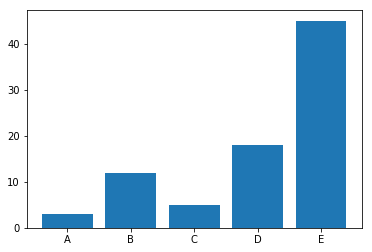

In [22]:
# Make a fake dataset:
height = [3, 12, 5, 18, 45]
bars = ('A', 'B', 'C', 'D', 'E')
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)

plt.show() # Show graphic


### Histogramm

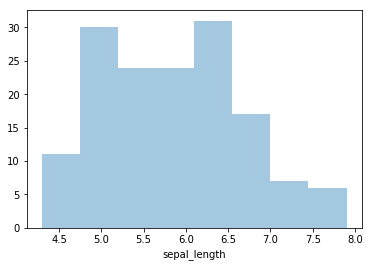

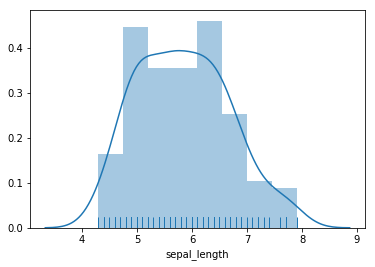

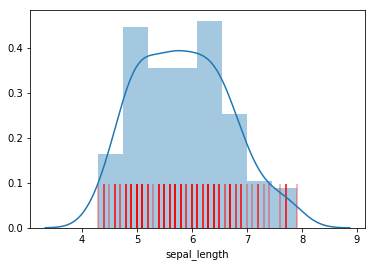

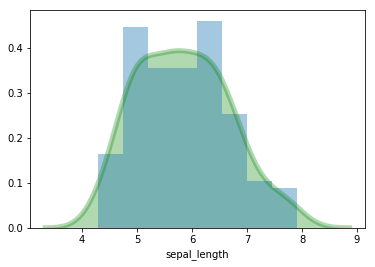

In [23]:
# Import library and dataset
iris = sns.load_dataset('iris')

# Hist only
sns.distplot(a=iris["sepal_length"], hist=True, kde=False, rug=False )
plt.show()
 
# Hist + Rug + kernel density
sns.distplot( a=iris["sepal_length"], hist=True, kde=True, rug=True )
plt.show()
 
# To change parameters of rug
sns.distplot( a=iris["sepal_length"], rug=True,
rug_kws={"color": "r", "alpha":0.3, "linewidth": 2, "height":0.2 }
)
plt.show()
 
# To change parameters of density distribution
sns.distplot( a=iris["sepal_length"], kde=True,
kde_kws={"color": "g", "alpha":0.3, "linewidth": 5, "shade":True }
)
plt.show()


### Kuchen-Diagramm

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3686a53c88>],
      dtype=object)

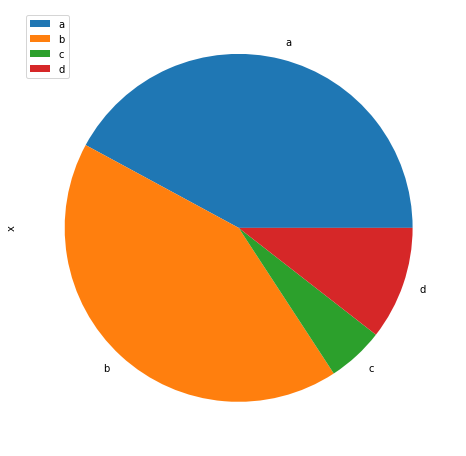

In [24]:
df = pd.DataFrame([8,8,1,2], index=['a','b','c','d'], 
                  columns=['x']) # just 4 values for 4 groups
 
df.plot(kind='pie', subplots=True, figsize=(8, 8))


### Box-Plot

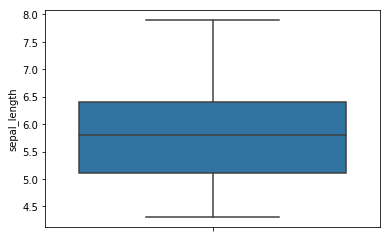

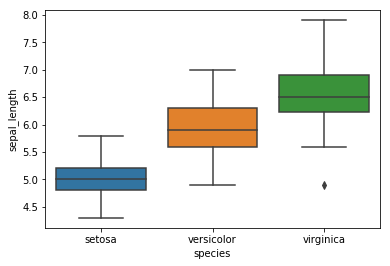

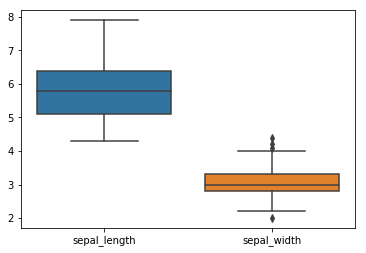

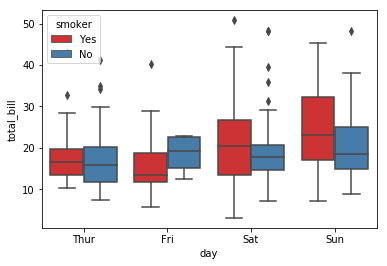

In [25]:
iris = sns.load_dataset('iris')

# Make boxplot for one group only
sns.boxplot(y=iris["sepal_length"])
plt.show()

sns.boxplot(x=iris["species"], y=iris["sepal_length"])
plt.show()

sns.boxplot(data=iris.iloc[:,0:2])
plt.show()

# Grouped boxplot
tips = sns.load_dataset('tips')
sns.boxplot(x="day", y="total_bill", hue="smoker", data=tips, palette="Set1")
plt.show()

### Streudiagramm

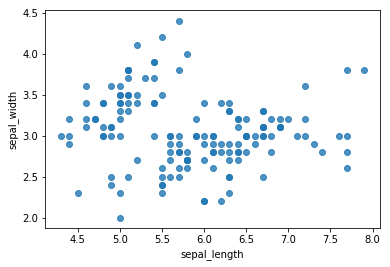

In [26]:
iris = sns.load_dataset('iris')

# use the function regplot to make a scatterplot
sns.regplot(x=iris["sepal_length"], y=iris["sepal_width"], fit_reg=False)
plt.show()

### Verbundenes Streudiagramm

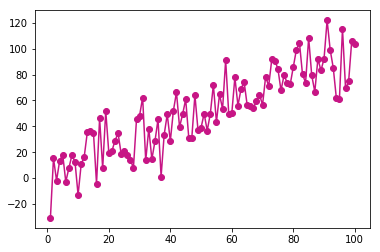

In [27]:
# Create data
df=pd.DataFrame({'var1': range(1,101), 'var2': np.random.randn(100)*15+range(1,101)})
 
# plot with matplotlib, but using seaborn style, as seaborn package has been loaded before
plt.plot('var1', 'var2', data=df, marker='o', color='mediumvioletred')
plt.show()

### Liniendiagramm

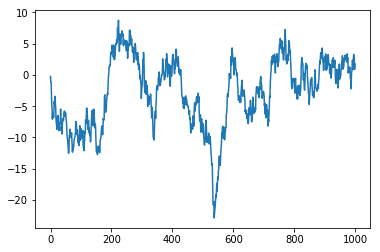

In [28]:
# create data
values=np.cumsum(np.random.randn(1000,1))
 
# use the plot function
plt.plot(values)
plt.show()

### Flächendiagramm

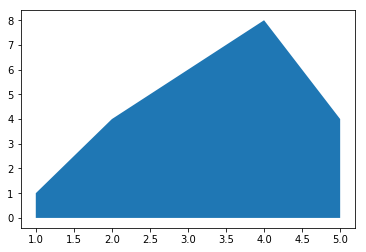

In [29]:
# Create data
x=range(1,6)
y=[1,4,6,8,4]
 
# Area plot
plt.fill_between(x, y)
plt.show()

### gestapeltes Flächendiagramm

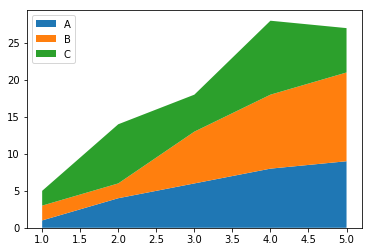

In [30]:
# Your x and y axis
x=range(1,6)
y=[ [1,4,6,8,9], 
    [2,2,7,10,12], 
    [2,8,5,10,6] ]
 
# Basic stacked area chart.
plt.stackplot(x,y, labels=['A','B','C'])
plt.legend(loc='upper left')
plt.show()

### Heatmap

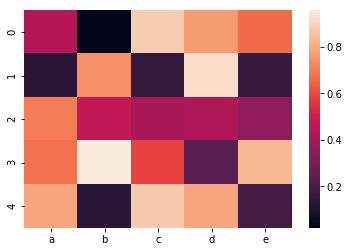

In [31]:
# Create a dataset (fake)
df = pd.DataFrame(np.random.random((5,5)), columns=["a","b","c","d","e"])
 
# Default heatmap
# just a visualization of this square matrix
p1 = sns.heatmap(df)
p1

### Grafiken speichern

In [32]:
# Um Grafiken am richtigen Ort zu speichern, muss man den kompletten Pfad angeben
#plt.savefig('/home/matt/Desktop/StatsKurs/plot1.png')
#plt.savefig('/home/matt/Desktop/StatsKurs/plot1.pdf')

# Ansonsten werden die Grafiken im derzeitigen Arbeits-Verzeichnis gespeichert

# Diese lässt sich so abrufen
import os
print(os.getcwd())

# und mit os.chdir() einem bestimmten Pfad zu weisen
os.chdir('/home/matt/Documents/Github/pyStats')

/home/matt/Documents/Github/pyStats


### Do it yourself

Liest erneut den Datensatz size.csv in Python ein

In [33]:
# Get help for reading csv file
# ?pd.read_csv

# Read csv file
size = pd.read_csv("/home/matt/Documents/Github/pyStats/data/size.csv")

Erstellt einen geeignete Grafik um die Groesse darzustellen

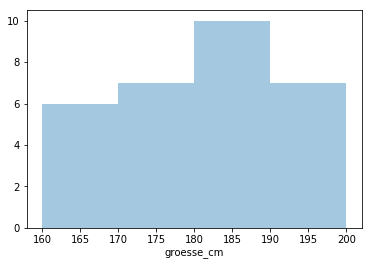

In [34]:
# Hist only
sns.distplot(a=size["groesse_cm"], hist=True, kde=False, rug=False )
plt.show()

# Alternative kann man den Plot auch einem Namen zuweisen und dann den Plot mit dem Namen aufrufen
#fig1 = sns.distplot(a=size["groesse_cm"], hist=True, kde=False, rug=False)
#fig1 

Plottet die Groesse in Zusammenhang zum Geschlecht

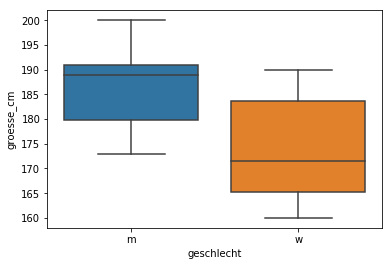

In [35]:
# Boxplot für Geschlecht und Groesse
sns.boxplot(x=size["geschlecht"], y=size["groesse_cm"])
plt.show()

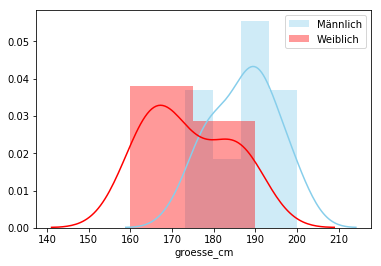

In [36]:
# Oder zwei Histogramme in einem Plot
size_m = size[(size.geschlecht == "m")]
size_w = size[(size.geschlecht == "w")]

sns.distplot(size_m["groesse_cm"] , color="skyblue", label="Männlich")
sns.distplot(size_w["groesse_cm"] , color="red", label="Weiblich")
plt.legend()

Plottet die Schuhgröße gegen die Körpergroesse

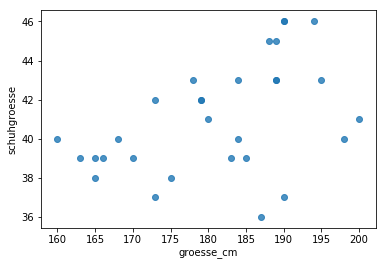

In [37]:
# use the function regplot to make a scatterplot
sns.regplot(x=size["groesse_cm"], y=size["schuhgroesse"], fit_reg=False)
plt.show()

Speichert die erstellten Grafiken als Datei

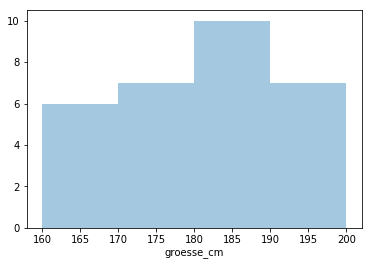

In [38]:
fig2 = sns.distplot(a=size["groesse_cm"], hist=True, kde=False, rug=False)
fig2
plt.savefig('/home/matt/Documents/Github/pyStats/plot.png')

# Get help of savefig function
#?plt.savefig